## Nome: Igor_Frutuoso_Domingos_de_Lima

# Exercício 1 - Dados perdidos

    1) Quantos missings totais possui sua base de dados?
    2) Quantas variáveis apresentaram valores perdidos?
    3) Mostre em algum das visões que aprendemos com o missingno
    4) Qual será o tratamento dado para os dados perdidos e por quê?

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib as mlp
import seaborn as sns
import plotly.express as px
import math
import statistics

In [2]:
base = pd.read_csv('Igor_Frutuoso_Domingos_de_Lima.csv', sep=';', encoding='UTF-8')

In [3]:
C1 = base.quilometragem.isnull().sum()
C2 = base.ano.isnull().sum()

total = C1 + C2

total

102

In [4]:
base.isnull().sum()

nome              0
motor             0
zero_km           0
acessórios        0
ano              22
quilometragem    80
valor             0
dtype: int64

<AxesSubplot: >

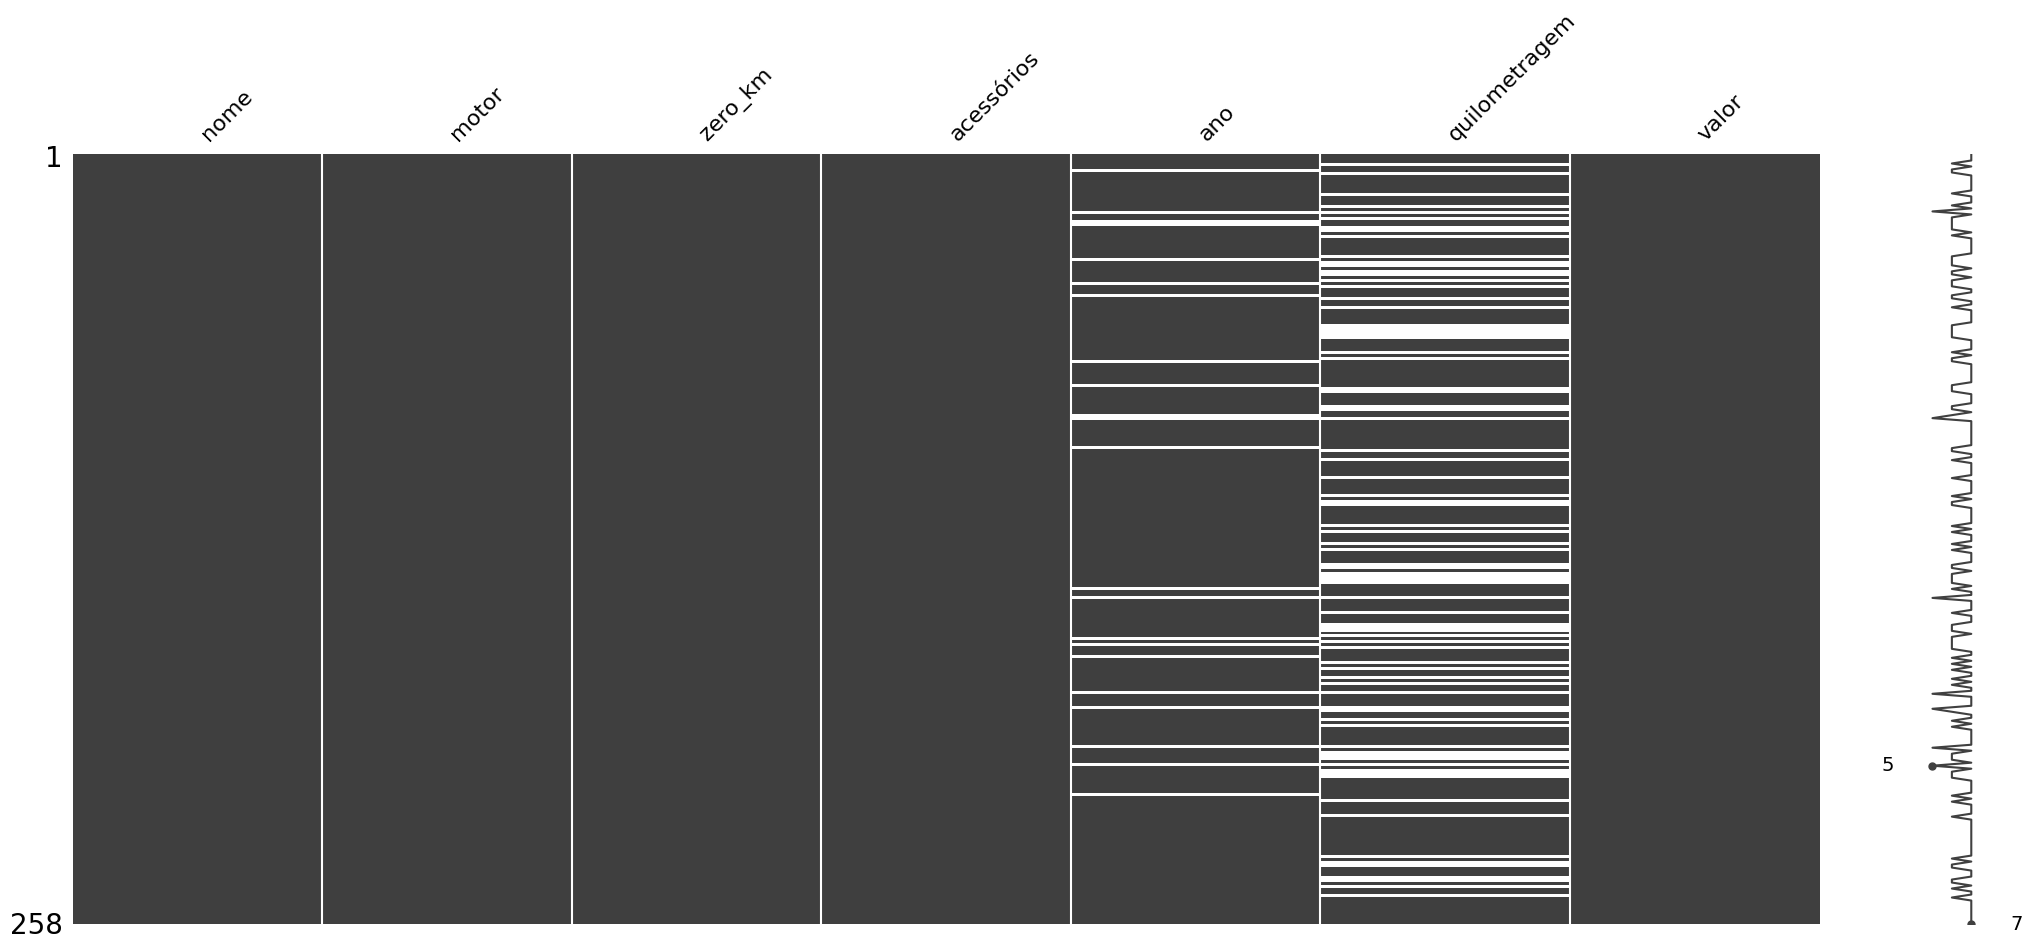

In [5]:
msno.matrix(base)

## Irei preencher os campos ano com o ano mais repetido e quilometragem com 0 para carros zero quilometro de 2019 e com a média para carros não zero quilometro

In [6]:
m_ano = statistics.mode(base['ano'])
base['ano'].fillna(m_ano, inplace=True)
base.head()

,nome,motor,zero_km,acessórios,ano,quilometragem,valor
0,Jetta Variant,Motor 4.0 Turbo,False,"['Rodas de liga', 'Travas elétricas', 'Piloto ...",2003.0,44410.0,88078.640625
1,Passat,Motor Diesel,False,"['Central multimídia', 'Teto panorâmico', 'Fre...",1991.0,5712.0,106161.937500
2,Crossfox,Motor Diesel V8,False,"['Piloto automático', 'Controle de estabilidad...",1990.0,37123.0,72832.156250
3,DS5,Motor 2.4 Turbo,True,"['Travas elétricas', '4 X 4', 'Vidros elétrico...",2019.0,NaN,124549.070312
4,Aston Martin DB4,Motor 2.4 Turbo,False,"['Rodas de liga', '4 X 4', 'Central multimídia...",2006.0,25757.0,102783.139783


In [7]:
m_km = base['quilometragem'].mean()
print(f'média {m_km:.2f}')

média 58785.18


In [8]:
d = {True: 0,
     False: 58785.18}
base['quilometragem'] = base['quilometragem'].fillna(base['zero_km'].map(d))
base.head()

,nome,motor,zero_km,acessórios,ano,quilometragem,valor
0,Jetta Variant,Motor 4.0 Turbo,False,"['Rodas de liga', 'Travas elétricas', 'Piloto ...",2003.0,44410.0,88078.640625
1,Passat,Motor Diesel,False,"['Central multimídia', 'Teto panorâmico', 'Fre...",1991.0,5712.0,106161.937500
2,Crossfox,Motor Diesel V8,False,"['Piloto automático', 'Controle de estabilidad...",1990.0,37123.0,72832.156250
3,DS5,Motor 2.4 Turbo,True,"['Travas elétricas', '4 X 4', 'Vidros elétrico...",2019.0,0.0,124549.070312
4,Aston Martin DB4,Motor 2.4 Turbo,False,"['Rodas de liga', '4 X 4', 'Central multimídia...",2006.0,25757.0,102783.139783


# Exercício 2 - Outliers

    1) Mostre um gráfico de caixa de cada variável numérica
    2) Qual tratamento você dará para os outliers e por quê?

In [9]:
px.box(base.ano)

In [10]:
px.box(base.quilometragem)

In [11]:
px.box(base.valor)

## não existem outliers para serem tratados

# Exercício 3 - Medidas resumo

    1) Para as variáveis numéricas, mostre: 
        a) média
        b) mediana
        c) percentis 25 e 75
        d) mínimo e máximo
    2) Para as variáveis categoricas, retorne a frequência delas

## Função Média

In [12]:
def media(nome_coluna):
    m = base[nome_coluna].mean()
    print(f'A média da(o) {nome_coluna} é de: {m:.0f}')

media('valor')
media('ano')
media('quilometragem')

A média da(o) valor é de: 98073
A média da(o) ano é de: 2009
A média da(o) quilometragem é de: 44886


## Função Mediana

In [13]:
def mediana(nome_coluna):
    print(f'A mediana da(o) {nome_coluna} é de: {base[nome_coluna].median():.0f}')

mediana('valor')
mediana('ano')
mediana('quilometragem')

A mediana da(o) valor é de: 96766
A mediana da(o) ano é de: 2010
A mediana da(o) quilometragem é de: 43274


## Criação das listas e da função percetil 25 e 75

In [14]:
def percentil_25(lista, nome_lista):
    print(f'O percentil 25 da(o) {nome_lista} é de: {np.percentile(lista, 25):.2f}')

def percentil_75(lista, nome_lista):
    print(f'O percentil 75 da(o) {nome_lista} é de: {np.percentile(lista, 75):.2f}')

In [15]:
lista_valor = np.array(base['valor'], dtype=int)
lista_ano = np.array(base['ano'], dtype=int)
lista_km = np.array(base['quilometragem'], dtype=int)

percentil_25(lista_valor, 'valor')
percentil_25(lista_ano, 'ano')
percentil_25(lista_km, 'quilometragem')
print('--------------------------------')
percentil_75(lista_valor, 'valor')
percentil_75(lista_ano, 'ano')
percentil_75(lista_km, 'quilometragem')

O percentil 25 da(o) valor é de: 71211.75
O percentil 25 da(o) ano é de: 2001.00
O percentil 25 da(o) quilometragem é de: 2453.00
--------------------------------
O percentil 75 da(o) valor é de: 122391.25
O percentil 75 da(o) ano é de: 2019.00
O percentil 75 da(o) quilometragem é de: 79599.50


## Funções mínimo e máximo

In [16]:
def minimo(coluna):
    print(f'O mínimo da(o) {coluna} é: {min(base[coluna]):.2f}')

def maximo(coluna):
    print(f'O máximo da(o) {coluna} é: {max(base[coluna]):.2f}')

In [17]:
minimo('valor')
minimo('ano')
minimo('quilometragem')
print('--------------------------------')
maximo('valor')
maximo('ano')
maximo('quilometragem')

O mínimo da(o) valor é: 50742.10
O mínimo da(o) ano é: 1990.00
O mínimo da(o) quilometragem é: 0.00
--------------------------------
O máximo da(o) valor é: 149489.92
O máximo da(o) ano é: 2019.00
O máximo da(o) quilometragem é: 119945.00


## Função frequência

In [18]:
def frequencia(coluna):
    print(f'A frequencia das variaveis da(o) {coluna} está abaixo:\n{base[coluna].value_counts()}')

In [19]:
frequencia('motor')
print('--------------------------------')
frequencia('nome')
print('--------------------------------')
frequencia('zero_km')

A frequencia das variaveis da(o) motor está abaixo:
Motor 3.0 32v            27
Motor Diesel             26
Motor V8                 26
Motor 4.0 Turbo          25
Motor 1.0 8v             25
Motor Diesel V8          21
Motor 5.0 V8 Bi-Turbo    21
Motor Diesel V6          21
Motor V6                 20
Motor 1.8 16v            18
Motor 2.0 16v            18
Motor 2.4 Turbo          10
Name: motor, dtype: int64
--------------------------------
A frequencia das variaveis da(o) nome está abaixo:
Jetta Variant         1
Palio Adventure       1
Equus                 1
Classe GL             1
Range Rover Evoque    1
                     ..
207 SW                1
Star                  1
Doblò Cargo           1
Cadillac CTS          1
Macan                 1
Name: nome, Length: 258, dtype: int64
--------------------------------
A frequencia das variaveis da(o) zero_km está abaixo:
False    197
True      61
Name: zero_km, dtype: int64


In [20]:
base.acessórios.str[2:8].replace('\W','_')

0      Rodas 
1      Centra
2      Piloto
3      Travas
4      Rodas 
        ...  
253    Contro
254    Bancos
255    Rodas 
256    Ar con
257    Centra
Name: acessórios, Length: 258, dtype: object

# Exercício 4 - Visualizações gráficas

    Com variáveis de sua escolha:

    1) Faça um histograma
    2) Faça um gráfico de dispersão
    3) Faça um gráfico de barras
    4) Faça um gráfico de linha

    Porém, faça para diferentes variáveis.

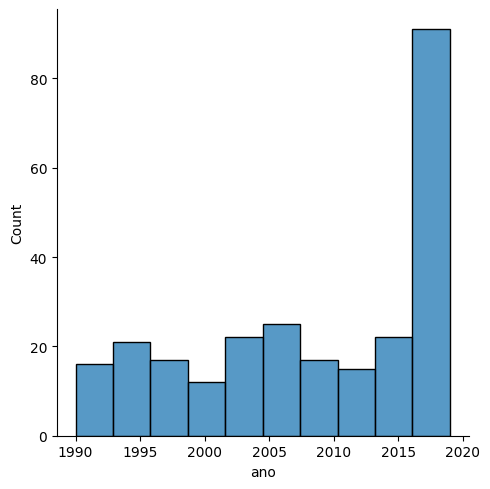

In [21]:
sns.displot(base.ano)

In [22]:
px.scatter(base.quilometragem)

In [23]:
px.bar(base.valor)

In [24]:
px.line(base.zero_km)